[[1 0]
 [0 1]]


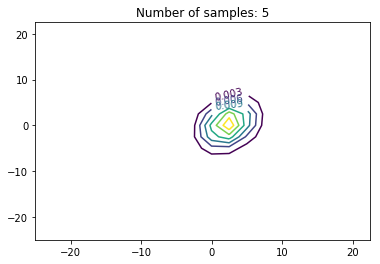

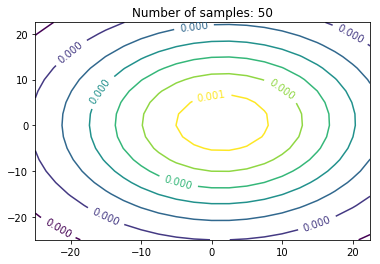

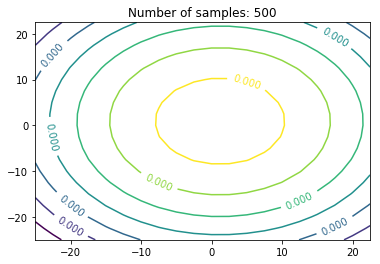

[[ 1.    0.25]
 [ 0.25  1.  ]]


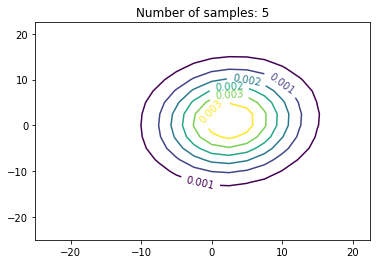

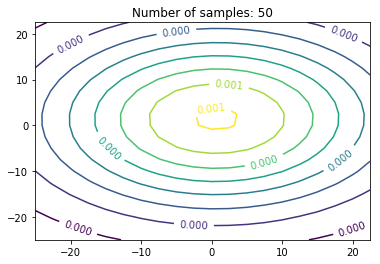

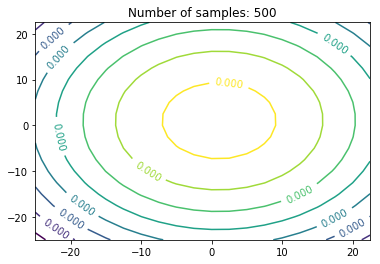

[[ 1.   0.9]
 [ 0.9  1. ]]


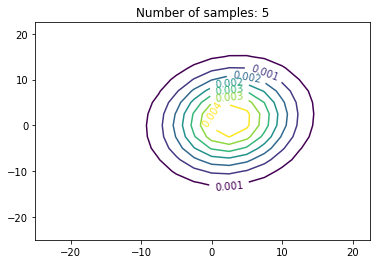

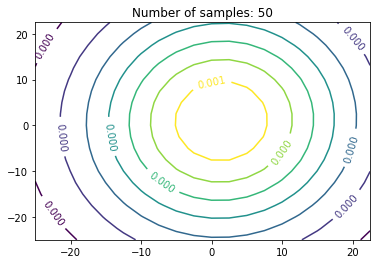

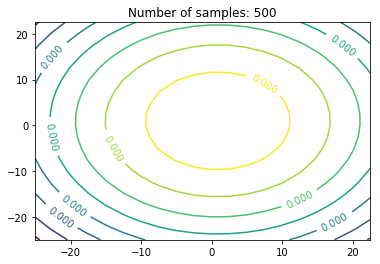

[[ 1.   -0.25]
 [-0.25  1.  ]]


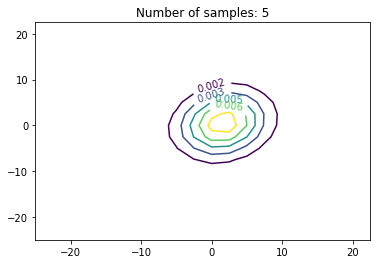

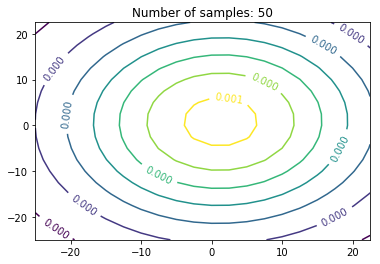

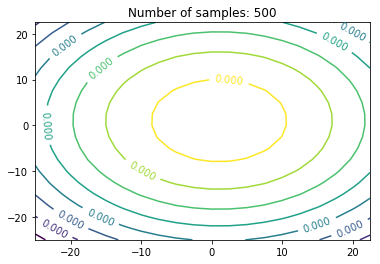

[[ 1.  -0.9]
 [-0.9  1. ]]


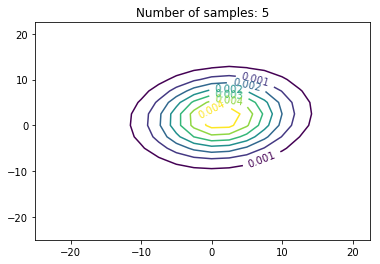

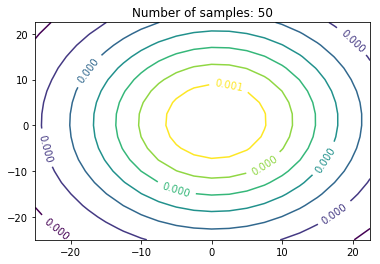

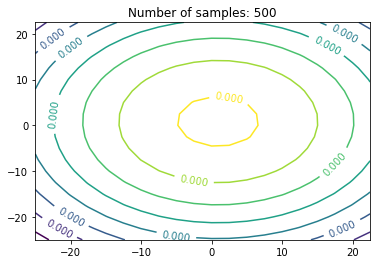

[[ 0.1  0. ]
 [ 0.   0.1]]


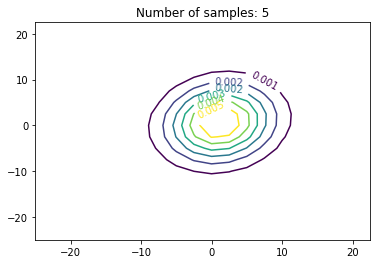

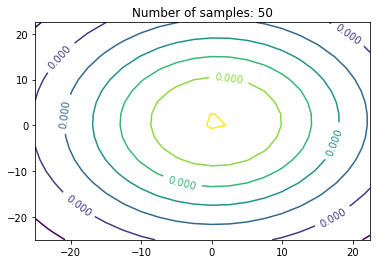

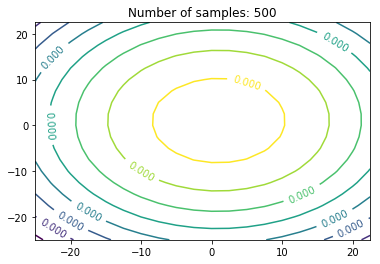

In [24]:
import numpy as np
import matplotlib.mlab as mlab
def gen_data(n):
    X = np.zeros((n,2))
    Z = np.zeros((n,1))
    Y = np.zeros((n,1))
    for i in range (n):
        X[i][0] = np.random.normal(0,2.236068)
        X[i][1] = np.random.normal(0,2.236068)
        Z[i] = np.random.normal(0,5)
        Y[i] = X[i][0] + X[i][1] + Z[i]
    return X, Y
def posterior_w(X, Y, sigma):
    var = X.T.dot(X) + np.linalg.inv(sigma)
    mu = np.linalg.inv(var).dot(X.T).dot(Y)
    return mu, var
import math
import matplotlib.pyplot as plt
def plot(mu, var, n): 
    delta = 2.5
    x = np.arange(-25.0, 25.0, delta)
    y = np.arange(-25.0, 25.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = mlab.bivariate_normal(X, Y, math.sqrt(var[0,0]), math.sqrt(var[1,1]), mu[0,0], mu[1,0], math.sqrt(abs(var[1,0])))
    #Z1 = mlab.bivariate_normal(X, Y, 1, 1, 0, 0, 0.5)
    plt.figure()
    CS = plt.contour(X, Y, Z1)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title("Number of samples: "+ str(n))
    plt.show()

sigma = [np.matrix([[1,0],[0,1]]),
         np.matrix([[1,0.25],[0.25,1]]),
         np.matrix([[1,0.9],[0.9,1]]),
         np.matrix([[1,-0.25],[-0.25,1]]),
         np.matrix([[1,-0.9],[-0.9,1]]),
         np.matrix([[0.1,0],[0,0.1]])
        ]
for sigmai in sigma:
    print(sigmai)
    X,Y = gen_data(5)
    mu, var = posterior_w(X,Y,sigmai)
    plot(mu, var, 5)
    X,Y = gen_data(50)
    mu, var = posterior_w(X,Y,sigmai)
    plot(mu, var, 50)
    X,Y = gen_data(500)
    mu, var = posterior_w(X,Y,sigmai)
    plot(mu, var, 500)